##  A. Create two numpy arrays. The first array, called arr1 should be of one dimension and consist of six elements of float type. The second array, called arr2 should be of two dimensions and each sub-array should consist of 5 elements of string type. Display these two numpy arrays. Display the following properties of both the arrays: data type and dimensions. Reshape arr1 into a two dimensional array of 2 rows and three columns, and display the reshaped array. Similarly, reshape arr2 into a single dimensional array and display the reshaped array.

In [1]:
import numpy as np

# Create the first numpy array (arr1) of float type
arr1 = np.array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6], dtype=float)

# Create the second numpy array (arr2) of string type
arr2 = np.array([['str1', 'str2', 'str3', 'str4', 'str5'],
                 ['str6', 'str7', 'str8', 'str9', 'str10']], dtype=str)

# Display the numpy arrays
print("arr1:")
print(arr1)
print("arr2:")
print(arr2)

# Display properties of arr1
print("Properties of arr1:")
print("Data type:", arr1.dtype)
print("Dimensions:", arr1.ndim)

# Display properties of arr2
print("Properties of arr2:")
print("Data type:", arr2.dtype)
print("Dimensions:", arr2.ndim)

# Reshape arr1 into a 2x3 array
reshaped_arr1 = arr1.reshape(2, 3)

# Reshape arr2 into a single-dimensional array
reshaped_arr2 = arr2.flatten()

# Display the reshaped arrays
print("Reshaped arr1:")
print(reshaped_arr1)
print("Reshaped arr2:")
print(reshaped_arr2)

arr1:
[1.1 2.2 3.3 4.4 5.5 6.6]
arr2:
[['str1' 'str2' 'str3' 'str4' 'str5']
 ['str6' 'str7' 'str8' 'str9' 'str10']]
Properties of arr1:
Data type: float64
Dimensions: 1
Properties of arr2:
Data type: <U5
Dimensions: 2
Reshaped arr1:
[[1.1 2.2 3.3]
 [4.4 5.5 6.6]]
Reshaped arr2:
['str1' 'str2' 'str3' 'str4' 'str5' 'str6' 'str7' 'str8' 'str9' 'str10']


## B. Implement the Decision Tree algorithm on IRIS dataset. Compare the results of using Gini Index and Entropy criterion for max_depth values of 4 and 5. Draw a color coded decision tree. Finally, demonstrate the prediction method using a new instance (The output should be the name of the species).

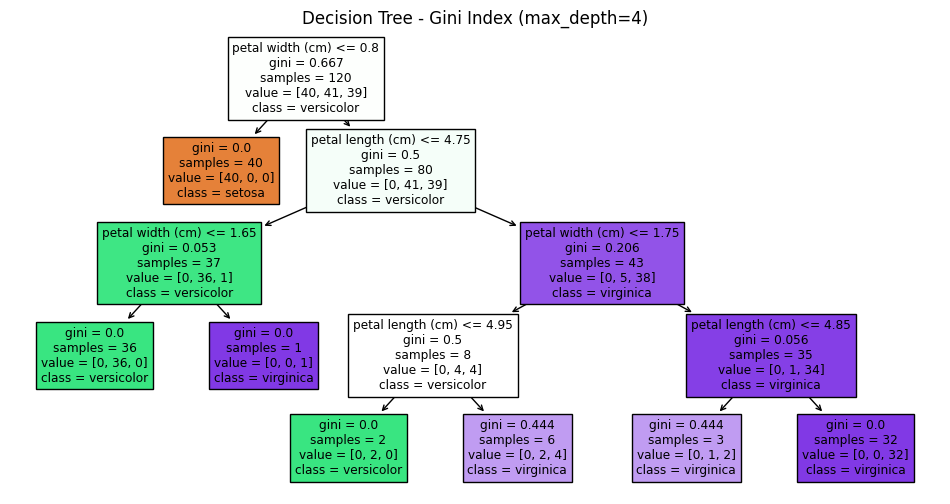

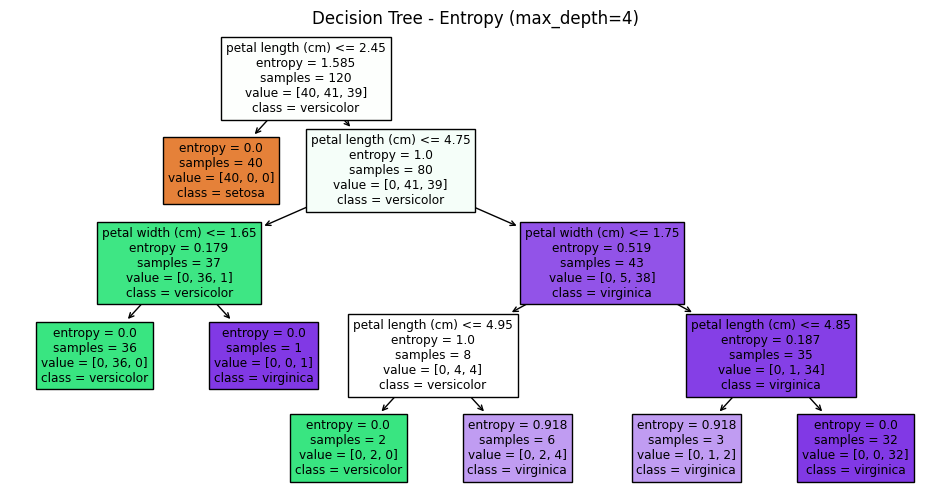

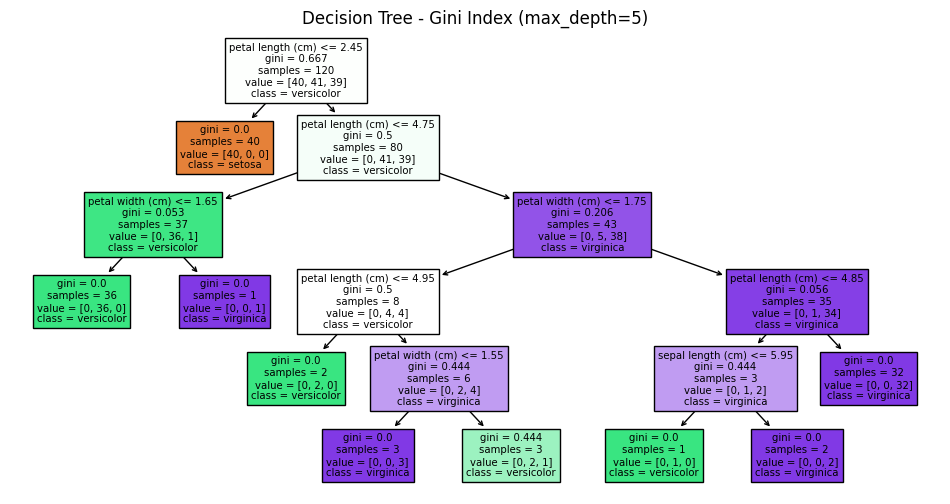

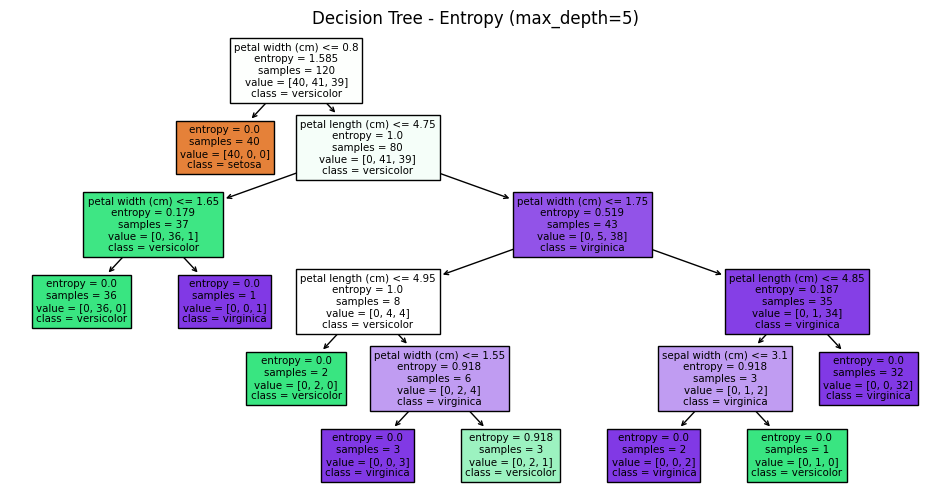

Prediction: setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the IRIS dataset
iris = load_iris()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Split the dataset into features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree models with different max_depth values
model_gini_4 = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_entropy_4 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model_gini_5 = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_entropy_5 = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Fit the models to the training data
model_gini_4.fit(X_train, y_train)
model_entropy_4.fit(X_train, y_train)
model_gini_5.fit(X_train, y_train)
model_entropy_5.fit(X_train, y_train)

# Evaluate the models
y_pred_gini_4 = model_gini_4.predict(X_test)
y_pred_entropy_4 = model_entropy_4.predict(X_test)
y_pred_gini_5 = model_gini_5.predict(X_test)
y_pred_entropy_5 = model_entropy_5.predict(X_test)

accuracy_gini_4 = metrics.accuracy_score(y_test, y_pred_gini_4)
accuracy_entropy_4 = metrics.accuracy_score(y_test, y_pred_entropy_4)
accuracy_gini_5 = metrics.accuracy_score(y_test, y_pred_gini_5)
accuracy_entropy_5 = metrics.accuracy_score(y_test, y_pred_entropy_5)

# Plot the decision tree for the model with Gini Index criterion and max_depth=4
plt.figure(figsize=(12, 6))
plot_tree(model_gini_4, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree - Gini Index (max_depth=4)")
plt.show()

# Plot the decision tree for the model with Entropy criterion and max_depth=4
plt.figure(figsize=(12, 6))
plot_tree(model_entropy_4, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree - Entropy (max_depth=4)")
plt.show()

# Plot the decision tree for the model with Gini Index criterion and max_depth=5
plt.figure(figsize=(12, 6))
plot_tree(model_gini_5, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree - Gini Index (max_depth=5)")
plt.show()

# Plot the decision tree for the model with Entropy criterion and max_depth=5
plt.figure(figsize=(12, 6))
plot_tree(model_entropy_5, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree - Entropy (max_depth=5)")
plt.show()

# Demonstrate prediction using a new instance
new_instance = [[5.1, 3.5, 1.4, 0.2]]
prediction = model_gini_4.predict(new_instance)

print("Prediction:", prediction[0])